In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os

import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from framework.ImageFeatures import ImageFeatures,getvoxelsize
from framework.Functions import cv2toski,pylsdtoski,polar_to_cartesian, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis
from framework.Importing import label_image,init_import
from framework.PreProcessingCYTO import cytoskeleton_preprocessing, df_cytoskeleton_preprocessing
from framework.PreProcessingNUCL import excludeborder, nuclei_preprocessing, df_nuclei_preprocessing, nuclei_segmentation
from framework.Processing import process3Dnuclei,analyze_cell
from framework.visualization import truncate_colormap, plot_hist, plot_pie
#from fractal_dimension import fractal_dimension
#from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


#### <center><font color='grey'>Directories</font></center>

In [2]:
folder    = os.path.dirname(os.getcwd()) + "\\Datasets\\Soraia"
options   = ["3D"]

data = init_import(folder,options)

>>> [3D] added.


In [5]:
data['3D']

,Name,Channel,Label,Image
10,MAX_10_AGSGatw_2245-0002_decon__ch00_PS.tif,0,WT,"[[52551, 52767, 50803, 56807, 56963, 54687, 52..."
11,MAX_11_AGSGatw_2245-0002_decon__ch01_PS.tif,1,WT,"[[36, 166, 452, 714, 714, 5492, 858, 92, 78, 1..."
12,MAX_12_AGSGatw_2245-0002_decon__ch02_PS.tif,2,None,"[[14736, 22830, 29448, 24572, 18090, 17620, 19..."
13,MAX_13_AGSGatw_2494-0016_decon_ch00_PS.tif,0,None,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 962, ..."
14,MAX_14_AGSGatw_2494-0016_decon_ch01_PS.tif,1,None,"[[0, 0, 0, 36, 286, 430, 362, 374, 748, 1418, ..."
15,MAX_15_AGSGatw_2494-0016_decon_ch02_PS.tif,2,Mock,"[[44849, 36801, 35181, 36645, 38649, 36767, 29..."
1,MAX_1_AGSGatw_WT-0010_decon__ch00_PS.tif,0,None,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,MAX_2_AGSGatw_WT-0010_decon__ch01_PS.tif,1,None,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,MAX_3_AGSGatw_WT-0010_decon__ch02_PS.tif,2,None,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,MAX_4_AGSGatw_Mock-0002_decon_ch00_PS.tif,0,None,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26..."


In [3]:
data['CYTO_DECONV'] = data['3D'][data['3D']['Channel'] == 2]
data['CYTO_PRE'] = df_cytoskeleton_preprocessing(data['CYTO_DECONV'])

>>> Image 12 done.
>>> Image 15 done.
>>> Image 3 done.
>>> Image 6 done.
>>> Image 9 done.


In [4]:
for index,row in data['CYTO_DECONV'].iterrows():
    texture,skeleton = cytoskeleton_preprocessing([row['Image'],index],  algorithm='soraia', parameters=[0.03,500],plot=False)
    
    break

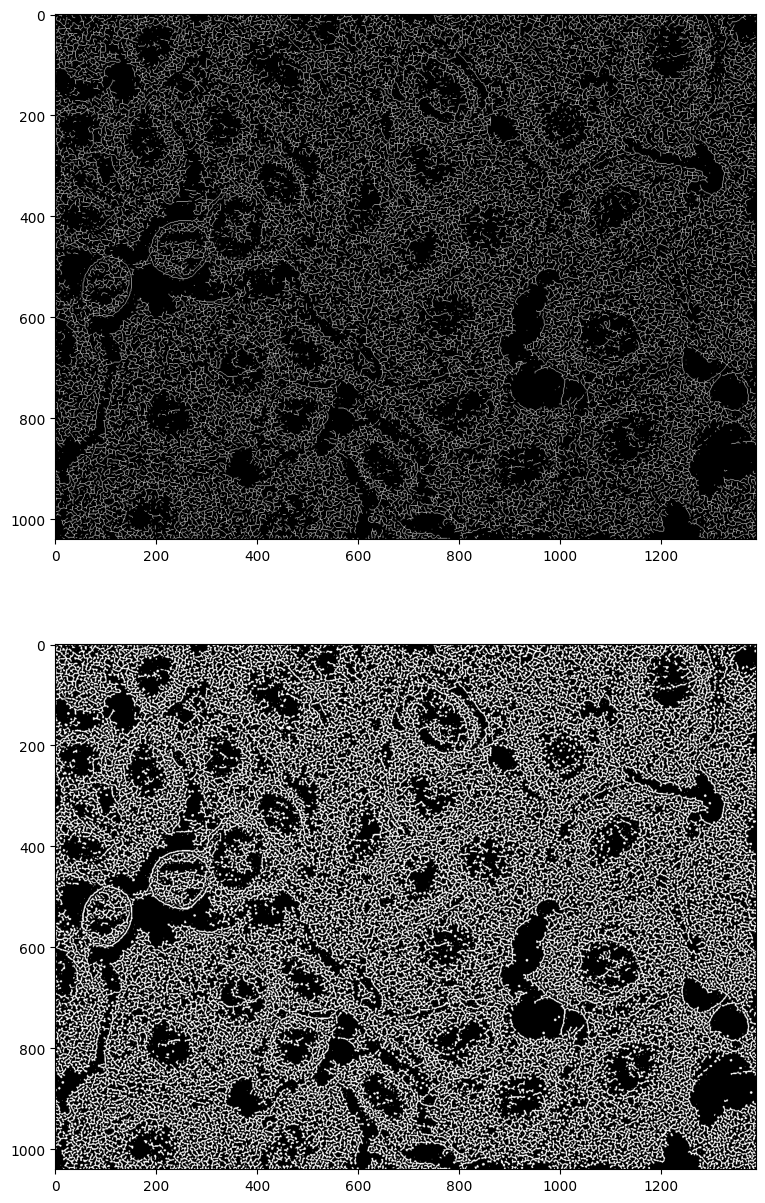

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.imshow(skeleton,cmap='gray')
plt.subplot(2,1,2)
plt.imshow(texture,cmap='gray')

In [5]:
img_id = 11
img_ids = 10,11,12
df = data['3D']

In [6]:
global ROI
print('🔎')
while 1:
    plt.close('all')

    # Original Image
    img = df['Image'][img_id]
    #sk  = TextureDF.loc[img_id]['Skeleton']
    
    mult = np.stack([1.8*df['Image'][12]/np.max(df['Image'][12]),1.8*df['Image'][11]/np.max(df['Image'][11]),1*df['Image'][10]/np.max(df['Image'][10])],axis=2)

    # Remove blue channel and convert to grayscale
    #tmp        = copy.deepcopy(img)
    #tmp[:,:,0] = 0
    #grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

    #mult = np.stack([1.3*(grey / np.max(grey)),1.3*sk*(grey / np.max(grey)), np.zeros_like(sk)],axis=2)
    #mult = np.stack([0.9*(grey / np.max(grey)),sk*(grey / np.max(grey)), 0.5 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)
    #mult = np.stack([1.5*(grey / np.max(grey)),sk, 0.2 * (OriginalDF['Image'][img_id][:,:,0] / np.max(OriginalDF['Image'][img_id][:,:,0]))],axis=2)

    
    # Select ROI QT
    %matplotlib qt
    fig,ax = plt.subplots(figsize=(30,30))

    plt.imshow(mult)
    plt.axis('off')
    # Plot Contours
    #plot_nuclei_contours(CentroidsDF=Centroids,imgIndex=img_id,ax=ax)
    # Define ROI
    #plt.imshow(image, cmap='gray')
    ROI = RoiPoly(color='r')
    #ROI.display_roi()
    #global mask,roi_coordinates
    #roi_coordinates = ROI.get_roi_coordinates()
    mask = ROI.get_mask(img)

    # Save ROI
    new = pd.DataFrame(data = {'Name': [df['Name'][img_id]],'Index': [img_id], 'Label': [df['Label'][img_id]], 'ROImask': [mask]})
    ROIs = ROIs.append(new,ignore_index=True)

    plt.show()


🔎


ImportError: Failed to import any qt binding

-----

>>>>>> SEGMENTATION: Image MAX_10_AGSGatw_2245-0002_decon__ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_13_AGSGatw_2494-0016_decon_ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_1_AGSGatw_WT-0010_decon__ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_4_AGSGatw_Mock-0002_decon_ch00_PS.tif
>>>>>> SEGMENTATION: Image MAX_7_AGSGatw_1901-0007_decon_ch00_PS.tif
>>>>>> PREPROCESSING: Image MAX_10_AGSGatw_2245-0002_decon__ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\Soraia_masks\MAX_10_AGSGatw_2245-0002_decon__ch00_PS.tif
>>> Preprocessing: 2.7027027027027026
>>> Preprocessing: 5.405405405405405
>>> Preprocessing: 8.108108108108109
>>> Preprocessing: 10.81081081081081
>>> Preprocessing: 13.513513513513514
>>> Preprocessing: 16.216216216216218
>>> Preprocessing: 18.91891891891892
>>> Preprocessing: 21.62162162162162
>>> Preprocessing: 24.324324324324323
>>> Preprocessing: 27.027027027027028
>>> Preprocessing: 29.7

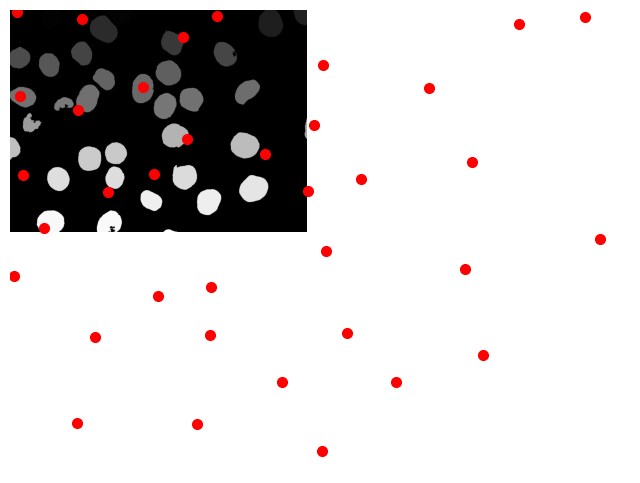

>>>>>> PREPROCESSING: Image MAX_13_AGSGatw_2494-0016_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\Soraia_masks\MAX_13_AGSGatw_2494-0016_decon_ch00_PS.tif
>>> Preprocessing: 4.545454545454546
>>> Preprocessing: 9.090909090909092
>>> Preprocessing: 13.636363636363637
>>> Preprocessing: 18.181818181818183
>>> Preprocessing: 22.727272727272727
>>> Preprocessing: 27.272727272727273
>>> Preprocessing: 31.818181818181817
>>> Preprocessing: 36.36363636363637
>>> Preprocessing: 40.90909090909091
>>> Preprocessing: 45.45454545454545
>>> Preprocessing: 50.0
>>> Preprocessing: 54.54545454545455
>>> Preprocessing: 59.09090909090909
>>> Preprocessing: 63.63636363636363
>>> Preprocessing: 68.18181818181819
>>> Preprocessing: 72.72727272727273
>>> Preprocessing: 77.27272727272727
>>> Preprocessing: 81.81818181818181
>>> Preprocessing: 86.36363636363636
>>> Preprocessing: 90.9090909090909
>>> Preprocessin

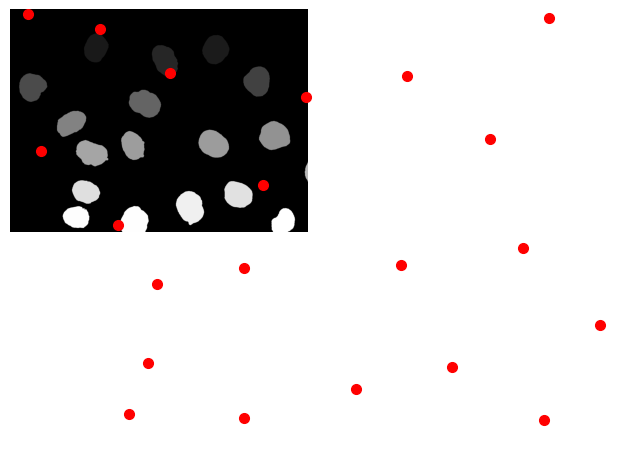

>>>>>> PREPROCESSING: Image MAX_1_AGSGatw_WT-0010_decon__ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\Soraia_masks\MAX_1_AGSGatw_WT-0010_decon__ch00_PS.tif
>>> Preprocessing: 3.125
>>> Preprocessing: 6.25
>>> Preprocessing: 9.375
>>> Preprocessing: 12.5
>>> Preprocessing: 15.625
>>> Preprocessing: 18.75
>>> Preprocessing: 21.875
>>> Preprocessing: 25.0
>>> Preprocessing: 28.125
>>> Preprocessing: 31.25
>>> Preprocessing: 34.375
>>> Preprocessing: 37.5
>>> Preprocessing: 40.625
>>> Preprocessing: 43.75
>>> Preprocessing: 46.875
>>> Preprocessing: 50.0
>>> Preprocessing: 53.125
>>> Preprocessing: 56.25
>>> Preprocessing: 59.375
>>> Preprocessing: 62.5
>>> Preprocessing: 65.625
>>> Preprocessing: 68.75
>>> Preprocessing: 71.875
>>> Preprocessing: 75.0
>>> Preprocessing: 78.125
>>> Preprocessing: 81.25
>>> Preprocessing: 84.375
>>> Preprocessing: 87.5
>>> Preprocessing: 90.625
>>> Preprocessing: 93

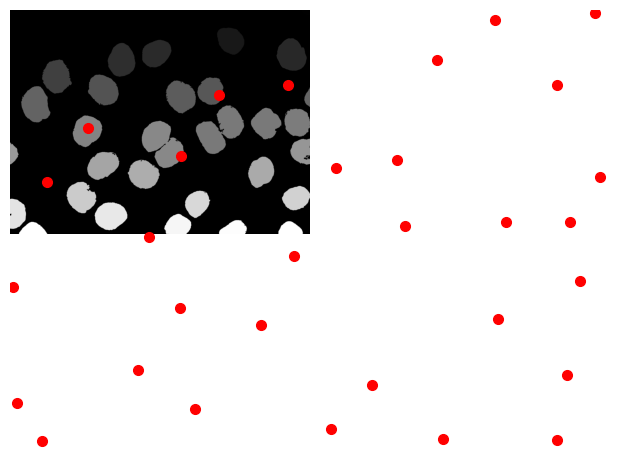

>>>>>> PREPROCESSING: Image MAX_4_AGSGatw_Mock-0002_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\Soraia_masks\MAX_4_AGSGatw_Mock-0002_decon_ch00_PS.tif
>>> Preprocessing: 2.7777777777777777
>>> Preprocessing: 5.555555555555555
>>> Preprocessing: 8.333333333333334
>>> Preprocessing: 11.11111111111111
>>> Preprocessing: 13.88888888888889
>>> Preprocessing: 16.666666666666668
>>> Preprocessing: 19.444444444444443
>>> Preprocessing: 22.22222222222222
>>> Preprocessing: 25.0
>>> Preprocessing: 27.77777777777778
>>> Preprocessing: 30.555555555555557
>>> Preprocessing: 33.333333333333336
>>> Preprocessing: 36.111111111111114
>>> Preprocessing: 38.888888888888886
>>> Preprocessing: 41.666666666666664
>>> Preprocessing: 44.44444444444444
>>> Preprocessing: 47.22222222222222
>>> Preprocessing: 50.0
>>> Preprocessing: 52.77777777777778
>>> Preprocessing: 55.55555555555556
>>> Preprocessing: 58.33333

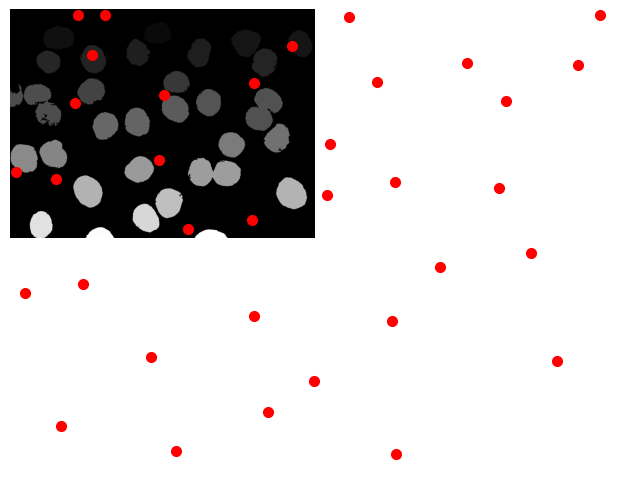

>>>>>> PREPROCESSING: Image MAX_7_AGSGatw_1901-0007_decon_ch00_PS.tif
C:\Users\diogo\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Projeto\Biological Quantification\Cytoskeleton\Datasets\Soraia_masks\MAX_7_AGSGatw_1901-0007_decon_ch00_PS.tif
>>> Preprocessing: 3.0303030303030303
>>> Preprocessing: 6.0606060606060606
>>> Preprocessing: 9.090909090909092
>>> Preprocessing: 12.121212121212121
>>> Preprocessing: 15.151515151515152
>>> Preprocessing: 18.181818181818183
>>> Preprocessing: 21.21212121212121
>>> Preprocessing: 24.242424242424242
>>> Preprocessing: 27.272727272727273
>>> Preprocessing: 30.303030303030305
>>> Preprocessing: 33.333333333333336
>>> Preprocessing: 36.36363636363637
>>> Preprocessing: 39.39393939393939
>>> Preprocessing: 42.42424242424242
>>> Preprocessing: 45.45454545454545
>>> Preprocessing: 48.484848484848484
>>> Preprocessing: 51.515151515151516
>>> Preprocessing: 54.54545454545455
>>> Preprocessing: 57.57575757575758
>>> Preprocessing: 60.6060606060606

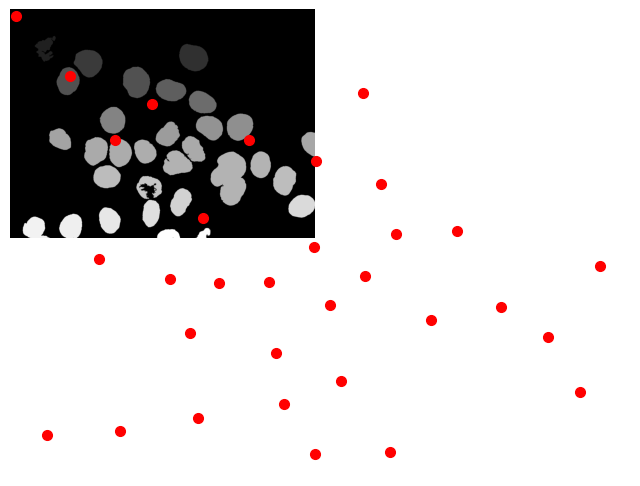

In [5]:
data['NUCL_PRE'] = df_nuclei_preprocessing(NUCL_df         = data['3D'][data['3D']['Channel'] == 0],                               #OR data['NUCL_DECONV'],data['3D']
                                           dir_nucldec     = os.getcwd() + "\\Datasets\\Soraia", #OR os.getcwd() + "\\Datasets\\Set 1-a-tubulin_Sofia", os.getcwd() + "\\Datasets\\Set 3D"
                                           dir_masks       = os.getcwd() + '\\Datasets\\Soraia_masks',             #OR os.getcwd() + '\\Datasets\\maisexps2', os.getcwd() + '\\Datasets\\exps_newalgo'
                                           algorithm       = "contour",                                         #OR stardist, contour                       
                                           algorithm_specs = [[0.8,0.8,0.8,0.8],400],                                         #OR [0.5,600] [0.7,1.15,1.0, 1.3,1.4,1.1,1.4,1.3,1,1,1.25,1.3,1.25,1.1,0.6,1.4,0.5]
                                           plot            = True,
                                           save            = False)                                         